In [ ]:
from google.colab import files
uploaded = files.upload()

Saving D__Big Data Certification_df_waze.csv to D__Big Data Certification_df_waze.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("D__Big Data Certification_df_waze.csv")
df.head()

In [ ]:
df['content'] = df['content'].str.replace("[^a-zA-Z#]", " ")
df['content'] = df['content'].str.replace("app", " ")
df['content'] = df['content'].str.replace("App", " ")
df['content'] = df['content'].str.replace("map", " ")
df['content'] = df['content'].str.replace("Waze", " ")

In [ ]:
import nltk
nltk.download('all')


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')+ stopwords.words('french')

In [ ]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['content'] = df['content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['content']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [ ]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

adding tokenized and checking

In [ ]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[0])

['most', 'accurate', 'direction', 'ever']


In [ ]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[0]) # print lemmatized review

['most', 'accurate', 'direction']


working correctly, applying to content column in df

In [ ]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['content'] = reviews_3

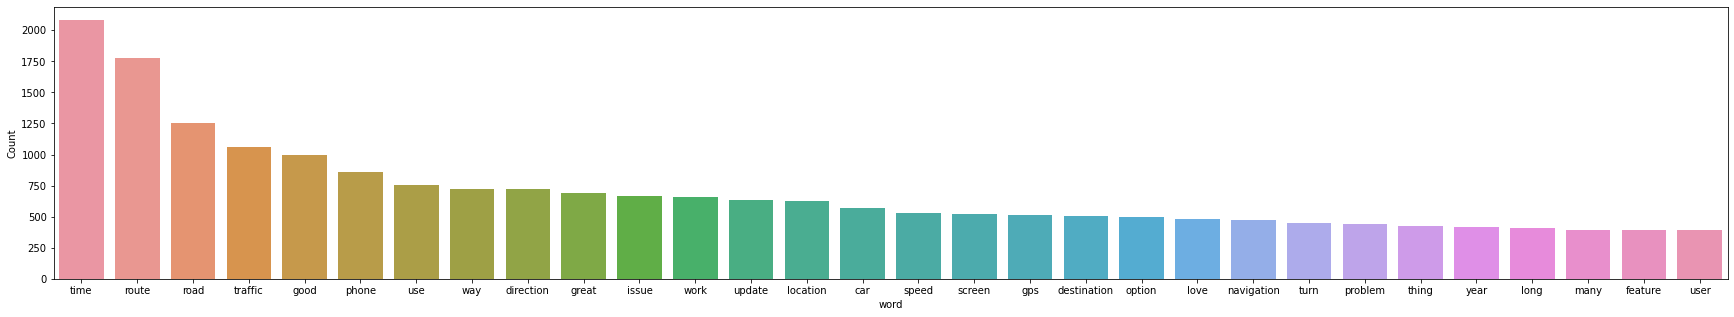

In [ ]:
from nltk import FreqDist
from matplotlib import pyplot as plt
import seaborn as sns


def freq_words(x, terms = 299):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 30 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(30,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()
freq_words(reviews_3, 30)

defining function to get unigrams, bigrams and trigrams

In [ ]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

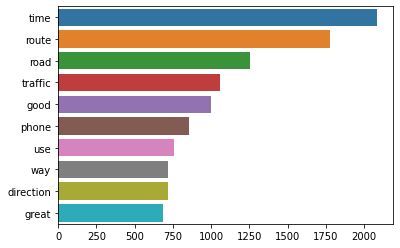

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
plot_top_ngrams_barchart(df['content'],1)


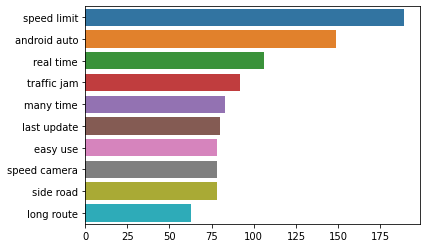

In [ ]:
plot_top_ngrams_barchart(df['content'],2)


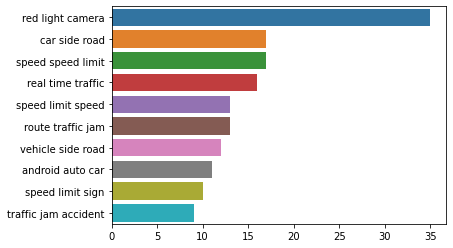

In [ ]:
plot_top_ngrams_barchart(df['content'],3)


below creating 4 different subsets from the main dataset. grouping into good/bad and helpful or non-helpful reviews. helpfulness is based on the thumbs up count that a review receives. goal is to see the if there are differences in the descriptive statistics and predictive models of each set.

In [ ]:
df_good_helpful = df[(df['score'] >= 3) & (df['thumbsUpCount'] > 0)]
df_good_helpful.head()

In [ ]:
df_good = df[(df['score'] >= 3) & (df['thumbsUpCount'] == 0)]
df_good.head()

In [ ]:
df_bad_helpful = df[(df['score'] < 3) & (df['thumbsUpCount'] > 0)]
df_bad_helpful.head()

In [ ]:
df_bad = df[(df['score'] < 3) & (df['thumbsUpCount'] == 0)]
df_bad.head()

finding the ngrams word frequency for each subgroup in order to see which words overlap between classes

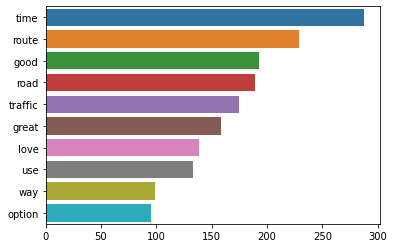

In [ ]:
plot_top_ngrams_barchart(df_good['content'],1)

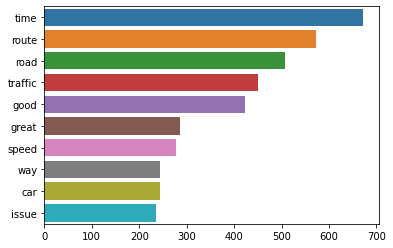

In [ ]:
plot_top_ngrams_barchart(df_good_helpful['content'],1)

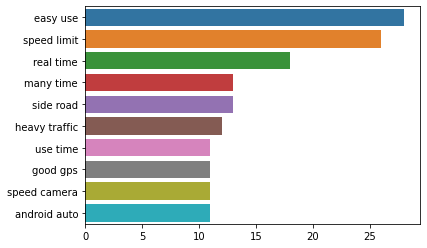

In [ ]:
plot_top_ngrams_barchart(df_good['content'],2)

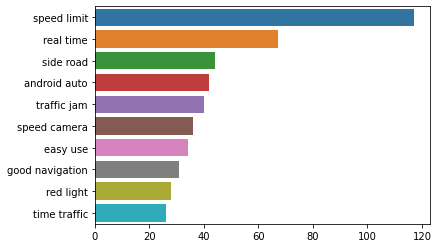

In [ ]:
plot_top_ngrams_barchart(df_good_helpful['content'],2)

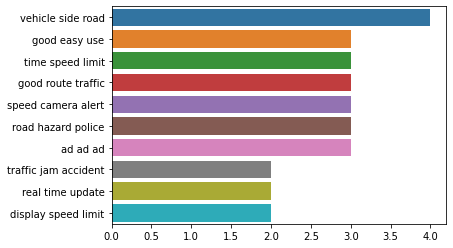

In [ ]:
plot_top_ngrams_barchart(df_good['content'],3)

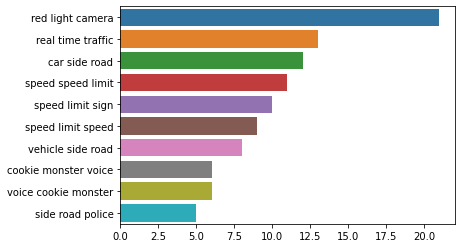

In [ ]:
plot_top_ngrams_barchart(df_good_helpful['content'],3)

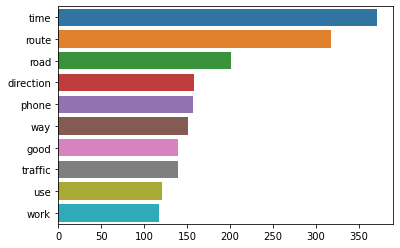

In [ ]:
plot_top_ngrams_barchart(df_bad['content'],1)

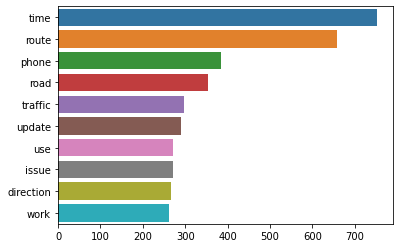

In [ ]:
plot_top_ngrams_barchart(df_bad_helpful['content'],1)

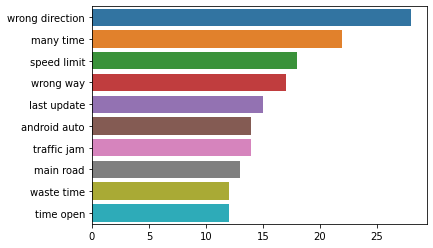

In [ ]:
plot_top_ngrams_barchart(df_bad['content'],2)

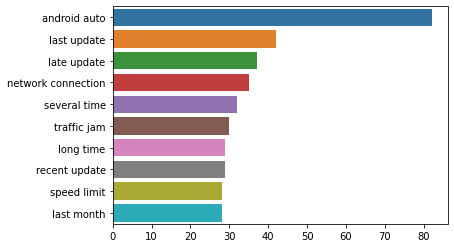

In [ ]:
plot_top_ngrams_barchart(df_bad_helpful['content'],2)

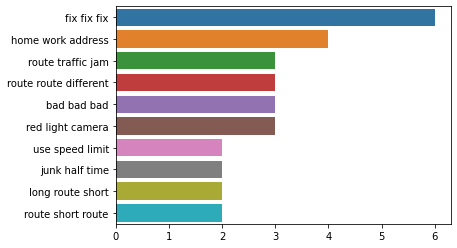

In [ ]:
plot_top_ngrams_barchart(df_bad['content'],3)

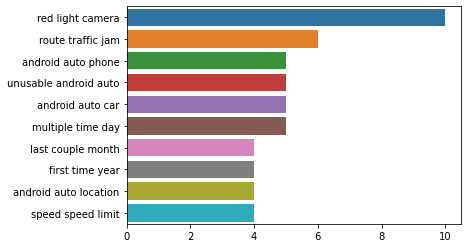

In [ ]:
plot_top_ngrams_barchart(df_bad_helpful['content'],3)